#Activation / Loss / Optimizer

필요한 라이브러리를 Import해줍니다.

Tensorflow를 tf라는 이름으로 불러오고,

모델 아키텍쳐를 묶어서 구성할 수 있게 하는 Sequential,

FNN의 기본 레이어인 Dense와 이미지를 1차원 벡터로 납작하게 눌러주는 Flatten을 불러옵니다.

In [1]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten 

# 기존 신경망 아키텍처에 조건 바꿔 적용해보기


MNIST 데이터를 불러옵니다. 

데이터를 불러오는 문구는 1번 실습 파일과 동일합니다. 

MNIST 데이터는 학습용 5만 장, 검증용 1만 장, 테스트용 1만 장, 총 7만 장의 손글씨 숫자 이미지가 있고,

각각의 이미지에 대한 정답 라벨이 길이 10짜리의 벡터로 구성되어있습니다.

In [2]:
# data load
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 0~255의 픽셀 값을 0~1로 조정
x_train, x_test = x_train / 255.0, x_test / 255.0

# shape 조정
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# 정답 label을 길이10 벡터화
y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test, depth=10)

# validation set 별도 구분
x_train, x_val = x_train[:50000], x_train[50000:]
y_train, y_val = y_train[:50000], y_train[50000:]

11493376/11490434 [==============================] - 0s 0us/step


# 아키텍쳐 구현 및 학습

모델 아키텍처를 구현합니다.

2차원의 이미지를 납작하게 누르고 Dense layer를 두 층 연결하되,

첫 번째 Dense 의 노드 수는 50으로 설정하였습니다.

나머지 설정은 앞서 실습했던 파일과 다르지 않습니다.

10epoch동안 학습합니다.

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# 커스터마이징을 위해선 기존 방식 이용, 기본 기능 활용하려면 string으로 이름을 입력

# 커스터마이징
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=1.0) 
# mse_loss = tf.keras.losses.MeanSquaredError()
# model.compile(optimizer=sgd_optimizer, loss=mse_loss, metrics=['accuracy'])  

# 기본 기능 활용
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result = model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 7s - loss: 0.0925 - accuracy: 0.1288 - val_loss: 0.0913 - val_accuracy: 0.1571
Epoch 2/10
1563/1563 - 4s - loss: 0.0906 - accuracy: 0.1828 - val_loss: 0.0899 - val_accuracy: 0.2211
Epoch 3/10
1563/1563 - 4s - loss: 0.0894 - accuracy: 0.2461 - val_loss: 0.0887 - val_accuracy: 0.2896
Epoch 4/10
1563/1563 - 3s - loss: 0.0883 - accuracy: 0.3062 - val_loss: 0.0875 - val_accuracy: 0.3467
Epoch 5/10
1563/1563 - 4s - loss: 0.0872 - accuracy: 0.3535 - val_loss: 0.0864 - val_accuracy: 0.3891
Epoch 6/10
1563/1563 - 4s - loss: 0.0860 - accuracy: 0.3847 - val_loss: 0.0851 - val_accuracy: 0.4142
Epoch 7/10
1563/1563 - 4s - loss: 0.0848 - accuracy: 0.4065 - val_loss: 0.0839 - val_accuracy: 0.4379
Epoch 8/10
1563/1563 - 4s - loss: 0.0836 - accuracy: 0.4256 - val_loss: 0.0826 - val_accuracy: 0.4537
Epoch 9/10
1563/1563 - 4s - loss: 0.0823 - accuracy: 0.4427 - val_loss: 0.0812 - val_accuracy: 0.4660
Epoch 10/10
1563/1563 - 3s - loss: 0.0810 - accuracy: 0.4498 - val_loss: 0.0798 - 

10 epoch을 학습하고 나니 테스트셋에 대한 분류정확도(accuracy)가 약 40%정도 나오는군요

아래 미션을 수행하고 결과를 비교해봅시다.

# 실습 MISSION #1
위에서 작성했던 코드를 조건에 맞게 변경해보자!

* activation을 relu로 변경
* loss를 cross-entropy로 변경 ('categorical_crossentropy', 하기 링크 참고)
* optimizer를 adam으로 변경

(힌트 : MNIST 숫자를 분류하는 과제이므로 output layer의 activation은 'softmax'여야 합니다. hidden layer에 한해서만 activation 설정을 변경해보세요)

**참고 링크**

* [tf.keras.activations docs](https://www.tensorflow.org/api_docs/python/tf/keras/activations)

* [tf.keras.losses docs](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

* [tf.keras.optimizer docs](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [5]:
# 아래 코드에서 MISSION 내용을 반영하여 학습하세요

model_m1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
 
model_m1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history_m1 = model_m1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_m1 = model_m1.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 5s - loss: 0.3488 - accuracy: 0.9016 - val_loss: 0.1990 - val_accuracy: 0.9449
Epoch 2/10
1563/1563 - 4s - loss: 0.1729 - accuracy: 0.9498 - val_loss: 0.1366 - val_accuracy: 0.9612
Epoch 3/10
1563/1563 - 4s - loss: 0.1283 - accuracy: 0.9627 - val_loss: 0.1248 - val_accuracy: 0.9646
Epoch 4/10
1563/1563 - 4s - loss: 0.1029 - accuracy: 0.9700 - val_loss: 0.1159 - val_accuracy: 0.9668
Epoch 5/10
1563/1563 - 4s - loss: 0.0856 - accuracy: 0.9749 - val_loss: 0.1059 - val_accuracy: 0.9684
Epoch 6/10
1563/1563 - 4s - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.1042 - val_accuracy: 0.9704
Epoch 7/10
1563/1563 - 4s - loss: 0.0640 - accuracy: 0.9806 - val_loss: 0.0971 - val_accuracy: 0.9721
Epoch 8/10
1563/1563 - 4s - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0985 - val_accuracy: 0.9724
Epoch 9/10
1563/1563 - 4s - loss: 0.0477 - accuracy: 0.9858 - val_loss: 0.0981 - val_accuracy: 0.9736
Epoch 10/10
1563/1563 - 4s - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.1033 - 

위 MISSION은 모델의 아키텍쳐 구조는 그대로 두고, 구조 外 설정들만 2챕터에서 배운 내용으로 변경하였습니다

이런 설정 변경만으로 테스트셋에 대한 성능 결과가 어떻게 달라졌나요?

# 실습 MISSION #2
다양한 optimizer를 테스트하고 수렴 속도를 확인하자

위 MISSION에서 작성한 모델을 활용, 
두 개의 서로다른 모델(model_sgd, model_sgdm)을 만들어 아래 두 optimizer를 각각 적용하고 빌드하여 history를 다른이름으로 저장(history_sgd, history_sgdm)한 뒤 그래프로 나타내시오

* SGD (기본설정)
* SGD with learning rate 0.1, momentum 0.1

(힌트, learning rate를 수정해보았던 것처럼 momentum 값도 커스터마이징할 수 있습니다!)

In [8]:
# 아래 코드에서 MISSION 내용을 반영하여 학습하세요


model_sgd = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_sgd.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])   ##### SGD를 적용하도록 바꿔보세요
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_sgd = model_sgd.evaluate(x_test,  y_test, verbose=2)

################################################################

model_sgdm = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
]) 

sgdm = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.1)  ##### 빈칸을 작성해보세요

model_sgdm.compile(optimizer=sgdm,loss='categorical_crossentropy',metrics=['accuracy'])
history_sgdm = model_sgdm.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=2)
result_sgdm = model_sgdm.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1563/1563 - 4s - loss: 0.7428 - accuracy: 0.8076 - val_loss: 0.3747 - val_accuracy: 0.9015
Epoch 2/10
1563/1563 - 4s - loss: 0.3691 - accuracy: 0.8975 - val_loss: 0.3074 - val_accuracy: 0.9136
Epoch 3/10
1563/1563 - 4s - loss: 0.3181 - accuracy: 0.9099 - val_loss: 0.2777 - val_accuracy: 0.9227
Epoch 4/10
1563/1563 - 4s - loss: 0.2887 - accuracy: 0.9185 - val_loss: 0.2546 - val_accuracy: 0.9290
Epoch 5/10
1563/1563 - 4s - loss: 0.2670 - accuracy: 0.9247 - val_loss: 0.2374 - val_accuracy: 0.9341
Epoch 6/10
1563/1563 - 4s - loss: 0.2493 - accuracy: 0.9297 - val_loss: 0.2263 - val_accuracy: 0.9360
Epoch 7/10
1563/1563 - 4s - loss: 0.2343 - accuracy: 0.9341 - val_loss: 0.2164 - val_accuracy: 0.9403
Epoch 8/10
1563/1563 - 4s - loss: 0.2220 - accuracy: 0.9374 - val_loss: 0.2036 - val_accuracy: 0.9450
Epoch 9/10
1563/1563 - 4s - loss: 0.2105 - accuracy: 0.9407 - val_loss: 0.1939 - val_accuracy: 0.9466
Epoch 10/10
1563/1563 - 4s - loss: 0.2006 - accuracy: 0.9433 - val_loss: 0.1867 - 

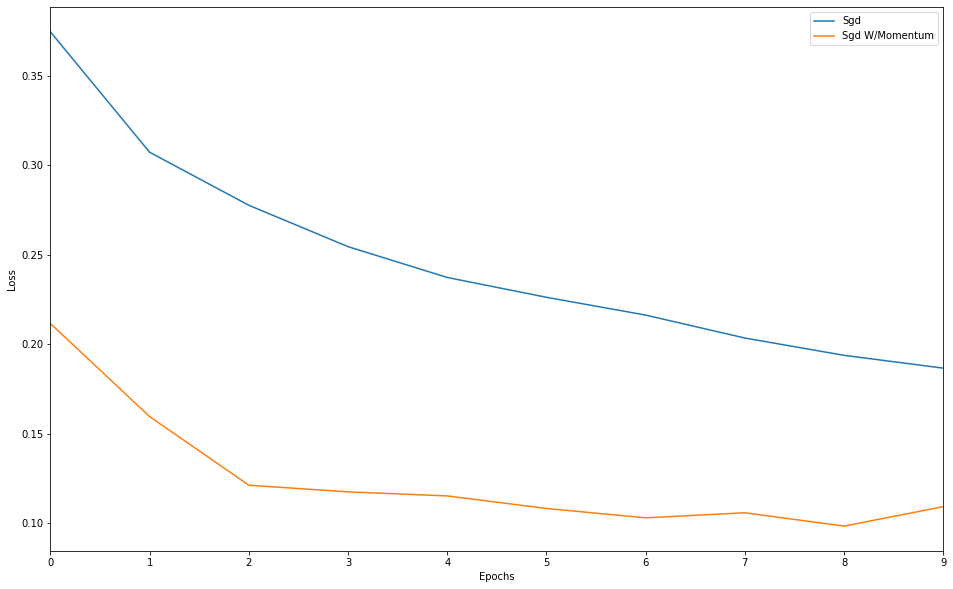

In [9]:
import matplotlib.pyplot as plt

def plot_history(histories):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    plt.plot(history.epoch, history.history['val_loss'], label=name.title()) 

  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  
plot_history([('SGD', history_sgd),
              ('SGD w/momentum', history_sgdm)])

일반 SGD를 적용할 때보다 momentum 설정을 두어 가속도를 적용하니 모델 수렴속도가 훨씬 빨라진 것을 볼 수 있습니다.